In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr

In [512]:
stock_name = 'GE'

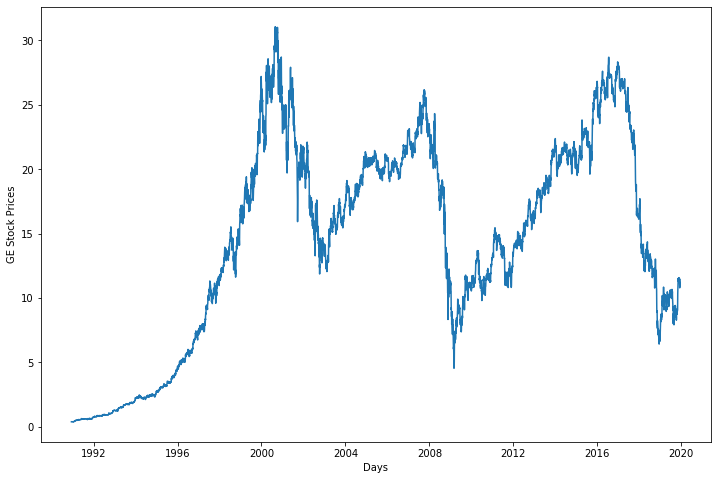

In [530]:
prices = dr.data.get_data_yahoo('GE',
        start = '1990-12-12', end = '2019-12-12').reset_index(drop = False)[['Date', 'Adj Close']]
plt.figure(figsize = (12, 8))
plt.plot(prices['Date'], prices['Adj Close'])
plt.xlabel('Days')
plt.ylabel('GE Stock Prices')
plt.show()



In [514]:
start_date = '1990-12-12'
end_date = '2019-11-12'
pred_end_date = '2020-01-12'


S_ge = dr.data.get_data_yahoo('GE',
        start = '1990-12-12', end = '2019-11-12').reset_index(drop = False)[['Date', 'Adj Close']]
print(S_ge.head())
print(S_ge.tail())

        Date  Adj Close
0 1990-12-11   0.390309
1 1990-12-12   0.392029
2 1990-12-13   0.387730
3 1990-12-14   0.382572
4 1990-12-17   0.380852
           Date  Adj Close
7282 2019-11-06      11.02
7283 2019-11-07      11.29
7284 2019-11-08      11.52
7285 2019-11-11      11.35
7286 2019-11-12      11.42


In [515]:
So = S_ge.loc[S_ge.shape[0] - 1, "Adj Close"]
print(So)

11.420000076293945


In [516]:
dt = 1
print(dt)

1


In [517]:
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
              format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred_end_date, 
              format = "%Y-%m-%d")).to_series(
              ).map(lambda x: 
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays
print(T)

43


In [518]:
N = T / dt
print(N)

43.0


In [519]:
t = np.arange(1, int(N) + 1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [520]:
returns = (S_ge.loc[1:, 'Adj Close'] - \
          S_ge.shift(1).loc[1:, 'Adj Close']) / \
          S_ge.shift(1).loc[1:, 'Adj Close']
print(returns.tolist())

[0.0044052638069179, -0.010964704390557033, -0.013303545116527465, -0.004494902463864961, 0.02708805696093326, -0.004395429917036756, 0.015452152124935883, 0.008695911673556055, -0.006465708524927315, -0.004338298392634616, -0.00217841180607966, 0.0021831676442505468, 0.0, -0.015250242073028756, -0.022123853422444033, -0.011312627436758663, -0.016017751898450613, 0.00930179088214566, -0.0023038165573186493, 0.0, -0.002310017030911589, 0.002315365564799061, 0.004618993297235882, 0.0045972781474010625, 0.06178506911003561, -0.0021547879145400444, -0.008639785736009117, -0.01307167921911897, 0.011037546682640842, 0.02183417417278768, 0.023504370367012462, 0.012525810932980011, 0.0, 0.022680795979262758, 0.032257467069037586, 0.0, 0.01757824123747092, 0.019193627833727883, 0.0037672435477320515, -0.02626672486300804, 0.00578038311285473, 0.022988450024684203, 0.0, 0.01685397379537338, -0.007365996586824161, 0.03339479000809268, 0.0, -0.017953659807718087, -0.003656161845049894, 0.016513484

In [521]:
mu = np.mean(returns)
print(mu)

0.0006375071724016642


In [522]:
sigma = np.std(returns)
print(sigma)

0.01870073593611504


In [523]:
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([ 0.18846736, -0.4825676 , -0.38534109, -0.55863846,  0.51656484,
        0.56917588,  0.27415282,  0.91303799, -0.07018091, -2.1218834 ,
       -1.01461113,  2.10702022, -0.30683232,  0.81880847,  1.0349202 ,
        0.88787512, -0.30918481,  0.51683677, -1.55581896, -0.05475562,
        0.46276525, -0.63456985,  2.40645046,  0.52968405, -0.83356867,
        0.6752612 ,  0.69040227, -0.2364525 ,  2.47166229, -1.38037413,
        0.67936289, -0.02434259, -1.10395213, -1.00320371, -0.48094369,
        0.51010944,  0.45919376, -0.60010506, -0.56868626, -1.49264314,
       -0.11773598, -2.51114179,  1.09026938]), '2': array([-0.49647447, -0.55377418,  0.91522676,  0.46407927, -1.58088499,
       -0.31352072, -0.14687212,  0.17355054, -0.13181472,  0.6057466 ,
        0.59069156, -0.16304781, -0.80867278, -0.91759901, -0.61744598,
       -1.09985809,  1.43638231,  1.96445634, -0.01068521, -1.3519467 ,
        0.99916662, -1.40365385,  0.07133989, -1.32464015,  1.46094259,
     

In [524]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([ 0.18846736, -0.29410024, -0.67944133, -1.23807979, -0.72151496,
       -0.15233908,  0.12181374,  1.03485174,  0.96467083, -1.15721257,
       -2.1718237 , -0.06480348, -0.3716358 ,  0.44717267,  1.48209287,
        2.36996799,  2.06078318,  2.57761994,  1.02180099,  0.96704537,
        1.42981062,  0.79524077,  3.20169123,  3.73137528,  2.89780661,
        3.5730678 ,  4.26347008,  4.02701758,  6.49867987,  5.11830574,
        5.79766863,  5.77332603,  4.6693739 ,  3.66617019,  3.18522651,
        3.69533594,  4.1545297 ,  3.55442464,  2.98573838,  1.49309524,
        1.37535926, -1.13578253, -0.04551315]), '2': array([-0.49647447, -1.05024865, -0.13502189,  0.32905739, -1.2518276 ,
       -1.56534832, -1.71222044, -1.5386699 , -1.67048462, -1.06473802,
       -0.47404646, -0.63709427, -1.44576705, -2.36336606, -2.98081205,
       -4.08067014, -2.64428783, -0.67983148, -0.69051669, -2.04246339,
       -1.04329677, -2.44695062, -2.37561073, -3.70025088, -2.23930828,
     

In [525]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print("diffusion:\n", diffusion)

drift:
 [0.00046265 0.0009253  0.00138795 0.00185059 0.00231324 0.00277589
 0.00323854 0.00370119 0.00416384 0.00462648 0.00508913 0.00555178
 0.00601443 0.00647708 0.00693973 0.00740237 0.00786502 0.00832767
 0.00879032 0.00925297 0.00971562 0.01017827 0.01064091 0.01110356
 0.01156621 0.01202886 0.01249151 0.01295416 0.0134168  0.01387945
 0.0143421  0.01480475 0.0152674  0.01573005 0.01619269 0.01665534
 0.01711799 0.01758064 0.01804329 0.01850594 0.01896858 0.01943123
 0.01989388]
diffusion:
 {'1': array([ 0.00352448, -0.00549989, -0.01270605, -0.023153  , -0.01349286,
       -0.00284885,  0.00227801,  0.01935249,  0.01804005, -0.02164073,
       -0.0406147 , -0.00121187, -0.00694986,  0.00836246,  0.02771623,
        0.04432015,  0.03853816,  0.04820339,  0.01910843,  0.01808446,
        0.02673851,  0.01487159,  0.05987398,  0.06977946,  0.05419112,
        0.066819  ,  0.07973003,  0.07530819,  0.1215301 ,  0.09571608,
        0.10842067,  0.10796545,  0.08732073,  0.06856008,  

In [526]:
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))
print(S)

[[11.42000008 11.46562396 11.36787752 11.29147598 11.17929941 11.29303984
  11.41916688 11.48317311 11.68633122 11.67640456 11.22734105 11.02141989
  11.46966953 11.40932242 11.59073123 11.82270889 12.02621357 11.96241195
  12.08418137 11.74308975 11.73649994 11.8439873  11.7096825  12.2543516
  12.38206725 12.19618914 12.35689327 12.52326039 12.47377648 13.06991613
  12.74274063 12.91163679 12.91173265 12.65375915 12.42432616 12.31878071
  12.44261228 12.55572786 12.42135548 12.29564339 11.96270779 11.94192152
  11.39936298 11.63955211]
 [11.42000008 11.31969831 11.20826088 11.40702219 11.51177495 11.1815976
  11.12137504 11.09600316 11.13722542 11.11494673 11.24677376 11.37696077
  11.34757268 11.18242928 10.99726498 10.87604384 10.65955903 10.95483713
  11.3700253  11.37301405 11.09421288 11.30868947 11.02080333 11.04062283
  10.77547112 11.07904746 11.45353535 11.43405405 11.3334432  11.53882074
  10.95705124 10.80293159 11.23365592 11.55789362 11.65539131 11.80142426
  11.67736161

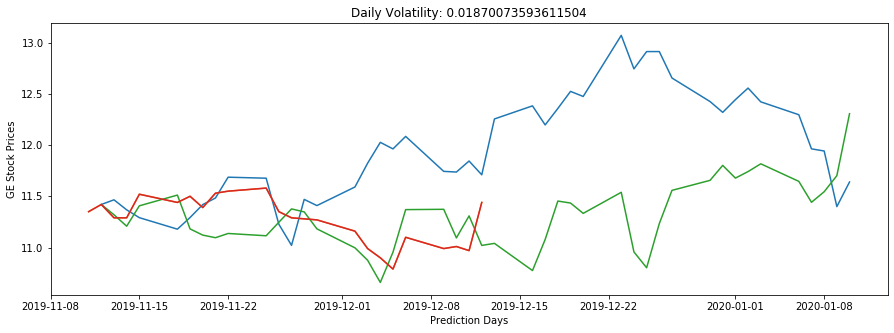

In [527]:
# Plotting the simulations
plt.figure(figsize = (15,5))

for i in range(scen_size):
    prices = dr.data.get_data_yahoo('GE',
             start = '2019-11-12', end = '2019-12-12').reset_index(drop = False)[['Date', 'Adj Close']]
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_ge["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.plot(prices['Date'], prices['Adj Close'])
    plt.ylabel('GE Stock Prices')
    plt.xlabel('Prediction Days')
    
plt.show()
